In [137]:
import cv2
from PIL import Image
import numpy as np
import argparse
import cv2
import imutils

#from pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local

In [138]:
import numpy as np
import cv2
 
def order_points(pts):

    rect = np.zeros((4, 2), dtype = "float32")


    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]


    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect

In [139]:
def four_point_transform(image, pts):

    rect = order_points(pts)
    (tl, tr, br, bl) = rect


    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))


    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))


    dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
            [0, maxHeight - 1]], dtype = "float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))


    return warped

In [140]:
img = cv2.imread('image1.jpeg')
ratio = img.shape[0] / 500.0
orig = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
cv2.imwrite('gray.jpeg',gray)
cv2.imwrite('blurgray.jpeg',blur_gray)

True

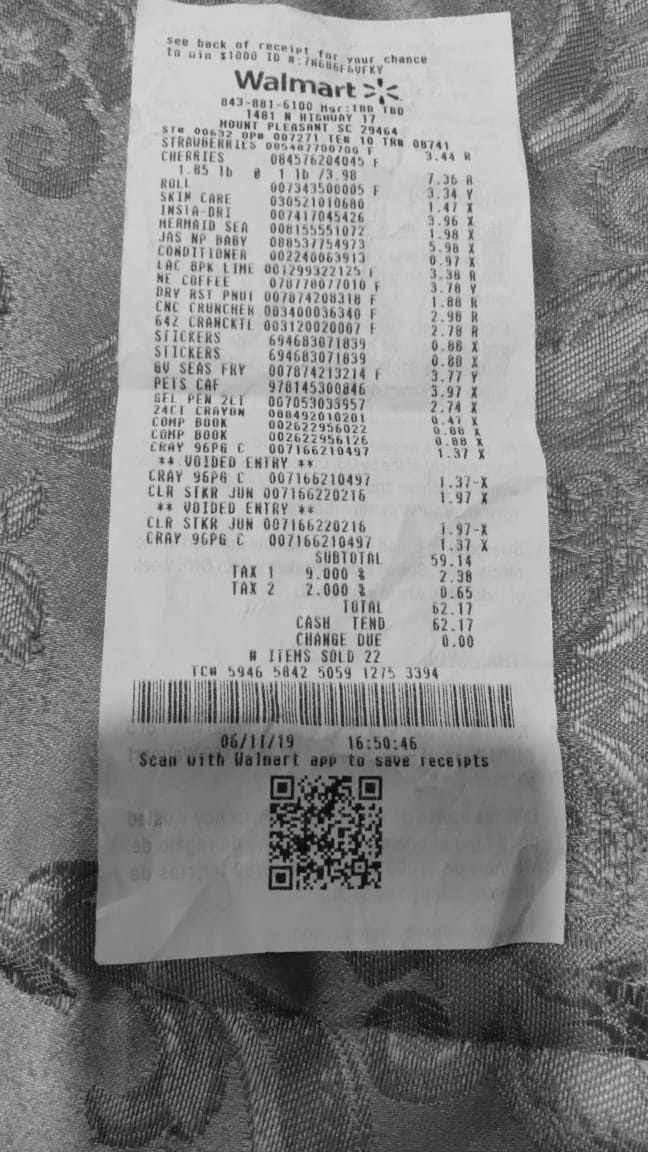

In [141]:
Image.open('gray.jpeg')

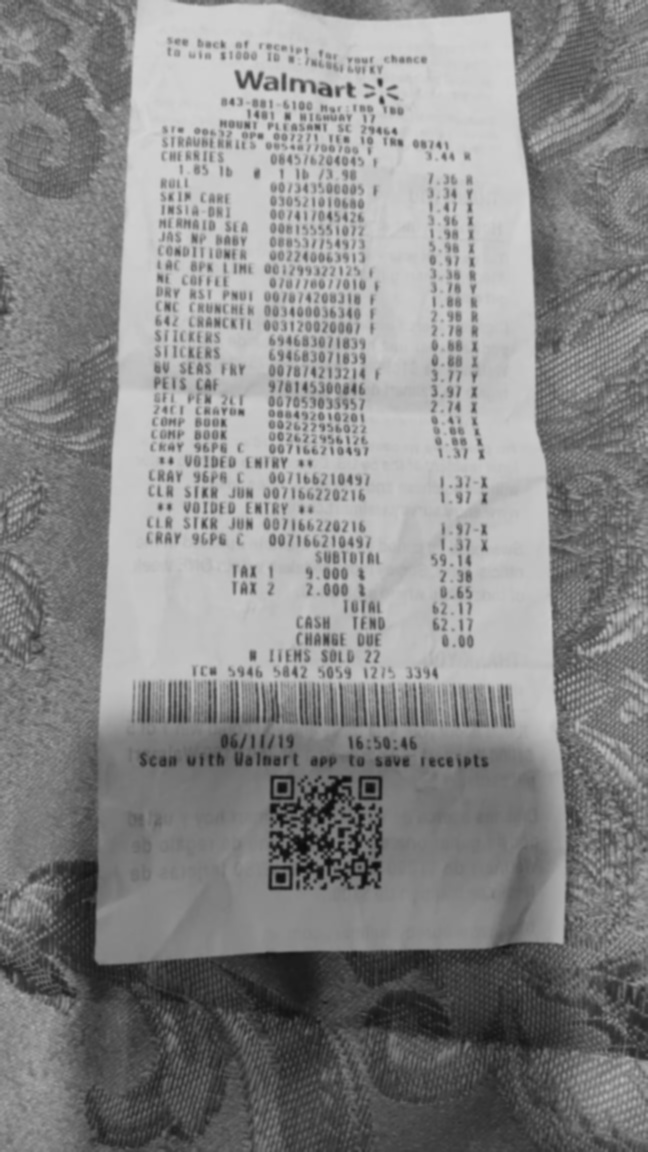

In [142]:
Image.open('blurgray.jpeg')

In [143]:
low_threshold = 150
high_threshold = 200
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
cv2.imwrite('edges.jpeg',edges)

True

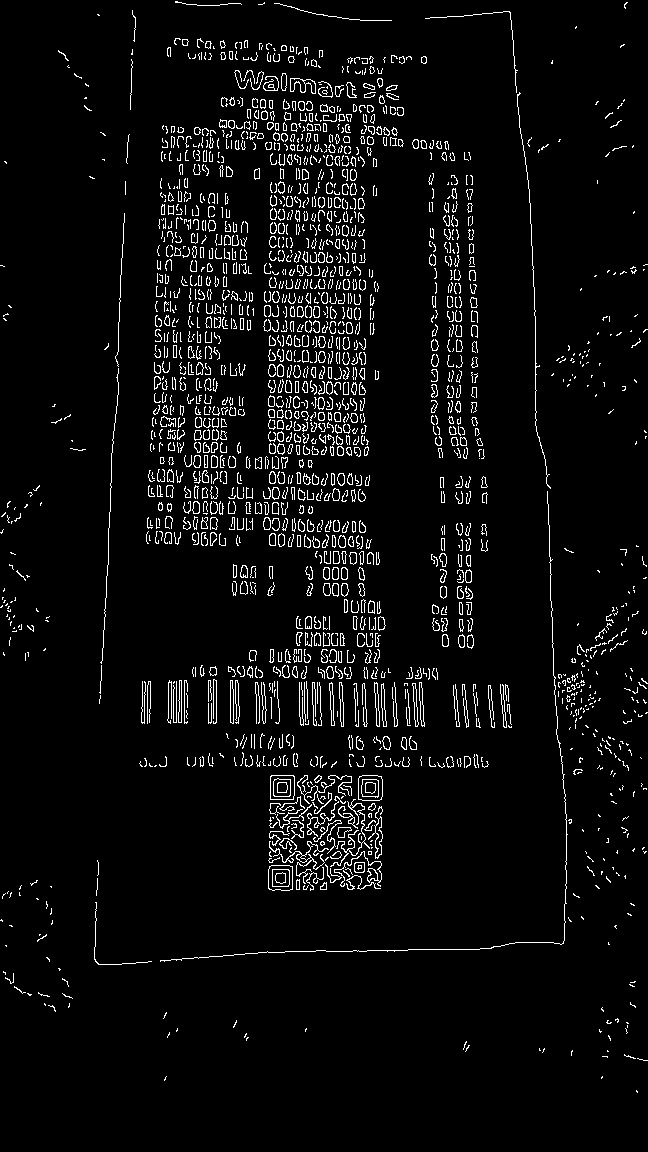

In [144]:
Image.open('edges.jpeg')

In [145]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(edges,-1,kernel)
cv2.imwrite("rt.jpeg",dst)

True

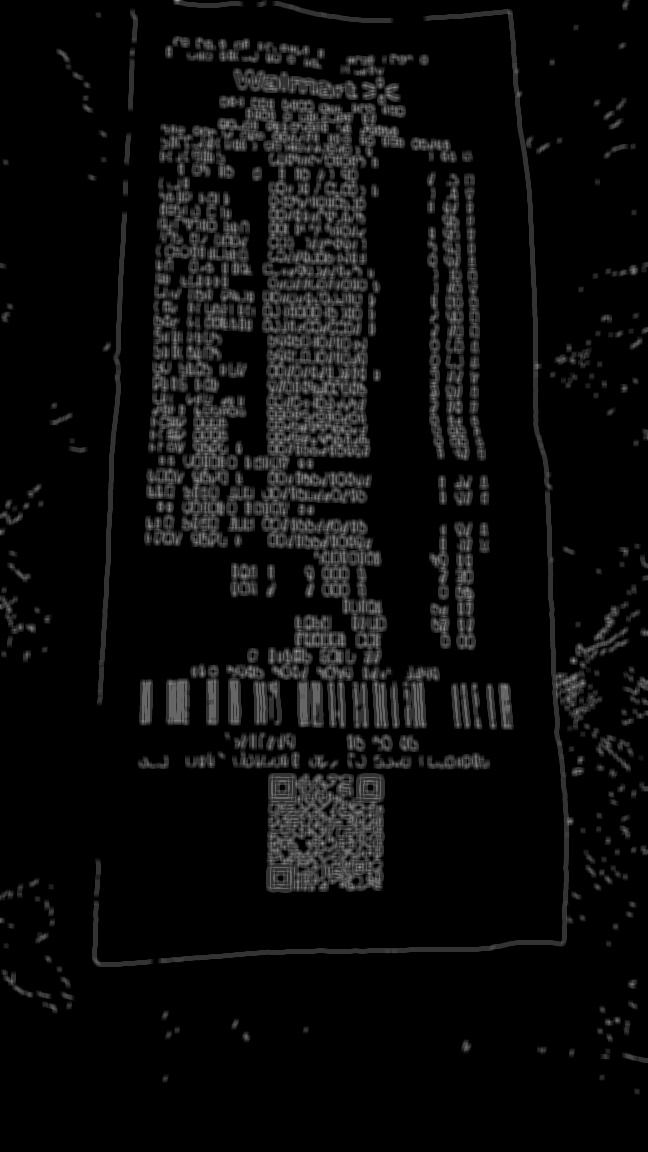

In [146]:
Image.open('rt.jpeg')

In [156]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
#if our approximated contour has four points, then we
# can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break
 
# show the contour (outline) of the piece of paper
screenCnt=approx
print("STEP 2: Find contours of paper")
contour=cv2.drawContours(img, screenCnt, -1,(0, 255, 0), 2)
#cv2.imshow("Outline", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
cv2.imwrite("cannyedge.jpeg",contour)

STEP 2: Find contours of paper


True

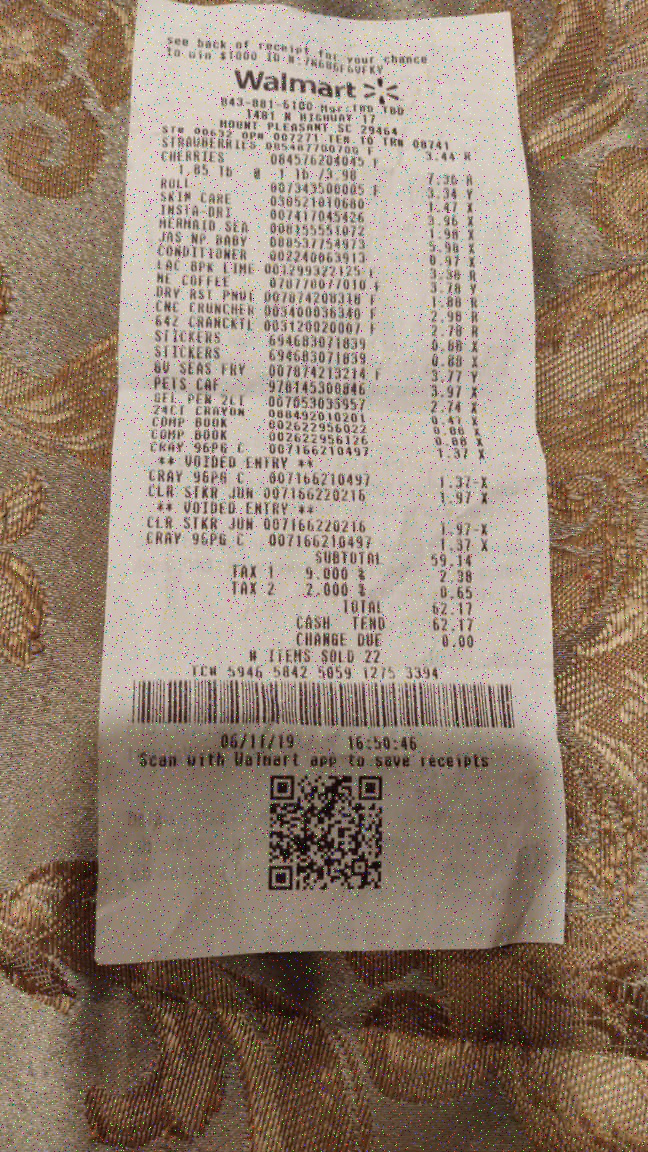

In [157]:
Image.open('cannyedge.jpeg')

In [158]:
warped = four_point_transform(contour, screenCnt.reshape(3, 2) * ratio)
 
# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
 

cv2.imwrite('wrap.jpeg',warped)

True

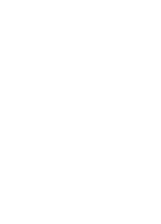

In [159]:
Image.open('wrap.jpeg')